# 머신러닝 - 지도학습

* 지도학습이란 정답을 알려주고 그 정답을 예측하는 기게학습니다.
* 지도학습 알고리즘
  1. 선형회귀분석
  2. 의사결정나무
  3. SVM
  4. KNN
  5. NN

#### 1. 선형회귀분석

##### 1. 선형회귀모델(Linear Regression Model)

w[0]: 0.393906  b: -0.031804


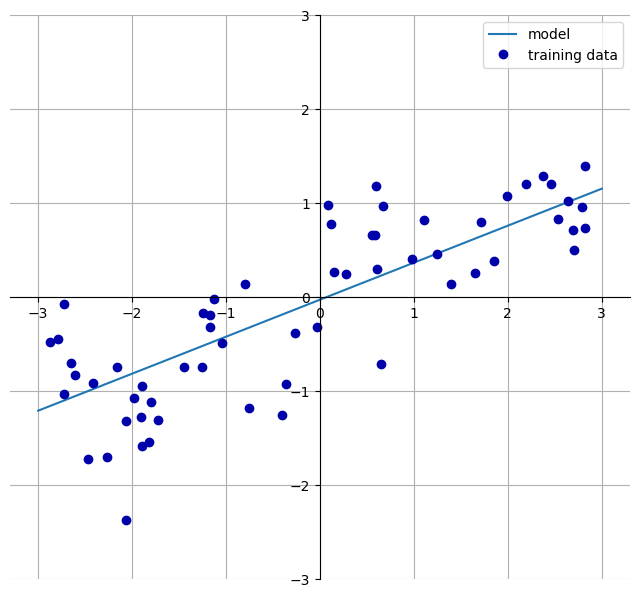

In [1]:
import mglearn
mglearn.plots.plot_linear_regression_wave() # 1차원 데이터셋 wave


##### 2. 선형회귀모델(최소제곱법)

* 선형회귀(Linear Regression) or 최소제곱법(OLS Old Least Squares)은 가장 간단하고 오랜된 알고리즘이다.
* 선형회귀는 예측과 훈련세트에 타겟(정답, label, 종속변수, y^)사이의 `평균제곱오차(MSE, Mean Square Error)`를 최소화하는 파라미터 `w(기울기 slope, 가중치 weight)`와 `b(편향 bias, 절편 intercept)`를 구한다.
* `평균제곱오차`는 예측값과 타깃값의 차이를 제곱하여 합산후에 샘플의 갯수로 나눈 것이다.

$$MSE = \frac{1}{n}\sum_{i=1}^{n}\left ( y_i - \tilde{y_i} \right )^{2}$$
$$RMSE = \frac{1}{n}\sqrt{\sum_{i=1}^{n}\left ( y_i - \tilde{y_i} \right )^{2}}$$

In [2]:
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  # 훈련용과 검증용데이터를 자동으로 분할

In [16]:
# 1. 무작위로 임의의 데이터 생성하기
X, y = mglearn.datasets.make_wave(n_samples=100)
# print(X, y)

# 2. 훈련용과 검증용테이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # 훈련용(75):검증용(25)

# 3. 기계학습(머신러닝)
lr = LinearRegression().fit(X_train, y_train)
# print(dir(lr))

# 4. 모델(결과)
print(f'lr.coef_(가중치 or 기울기) = {lr.coef_}')
print(f'lr.intercept_(bias or intercept) = {lr.intercept_}')

# y = wx + b
# y = 0.40443939*x + -0.022568028173365354

# 결과분석
# 기울기 파라미터(w)는 가중치 weight 또는 계수 coefficient라고 하며 coef_속성에 저장되고
# 편향(offset, bias) 또는 절편(intercept)파라미터 b는 intercept_속성에 저장된다.
# intercept_속성은 항상 실수값 한 개이지만 coef_속성은 각 입력특성에 하나씩 대응이 되는
# numpy배열이다. 
# wave데이터셋은 입력특성이 한 개이기 때문에 coef_속성도 하나의 값만 가지고 있다.

lr.coef_ = [0.40443939]
lr.intercept_ = -0.022568028173365354


In [25]:
# 5. 평가(검증)
print(f'훈련용데이터셋의 점수 = {lr.score(X_train, y_train)}')  # 훈련용의 MSE값 = R2값이라고 한다.
print(f'검증용데이터셋의 점수 = {lr.score(X_test, y_test)}')    # 검증용의 MSE값 

# 결과분석
# R2값이 0.66인 것은 그리 좋지 않은 결과이다. 하지만 훈련용과 비슷한 것을 알수가 있다.
# 그래서 이 모델은 과소적합상태를 의미한다.

훈련용데이터셋의 점수 = 0.5932911361660249
검증용데이터셋의 점수 = 0.6599448011276341


In [37]:
# 1차원 데이타셋에서는 모델이 단순하기 떄문에 과적합화를 우려할 필요는 없미지만
# 특성이 많은 데이터셋에서는 선형모델의 성능이 매우 높아져서 과대적합이 될 가능성이 매우 높다.
# 특성이 많은 보스톤주택가격데이터셋의 경우 506개의 샘플에 104개의 특성이 있다.
X, y = mglearn.datasets.load_extended_boston()    

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
lr = LinearRegression().fit(X_train, y_train)

print(f'훈련용데이터셋의 점수 = {lr.score(X_train, y_train):.2f}') 
print(f'검증용데이터셋의 점수 = {lr.score(X_test, y_test):.2f}') 

# 결과분석
# 과거데이터는 94%의 예측률이지만 미래데이터는 78%의 예측률을 보인다.
# 과거데이터는 예측을 잘하지만 미래데이터는 예측을 잘하지 못하는 과대적합화 현상을 보인다.

훈련용데이터셋의 점수 = 0.94
검증용데이터셋의 점수 = 0.78


##### 3. 릿지(Ridge)회귀분석

* 릿지회귀분석도 회귀를 위한 선형모델이다.
* 하지만, 릿지회귀에서는 특성들이 가중치(기울기)에 주는 영향을 최소화 할 수 있게 하는데
* 이런 것을 규제(Regularization)이라고 한다.
* 규제란? 기계학습모델이 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미이다.
* 규제는 L1규제와 L2규제방법이 있는데 `릿지회귀에서는 L2규제`를 사용한다.

In [45]:
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
ridge = Ridge().fit(X_train, y_train)
# print(dir(ridge))

print(f'훈련용데이터셋의 점수 = {ridge.score(X_train, y_train):.2f}') 
print(f'검증용데이터셋의 점수 = {ridge.score(X_test, y_test):.2f}') 

# 결과분석
# 훈련세트에서는 LR보다 예측률이 낮지만 검증세트에서는 점수가 높다.
# 즉, 과대적합이 발생할 가능성이 적어진다.

훈련용데이터셋의 점수 = 0.87
검증용데이터셋의 점수 = 0.81


In [57]:
# 규제는 Ridge모델의 alpha라는 옵션이 있는데 이 알파값(Reqularization Strength)이 과대적합이 발생
# 되지 않도록 조정하는 값이다. 기본값은 1이다.
# 알파값을 높이면 예측률이 낮아지고 낮추면 예측율이 높아기게 된다. 즉, 알파값을 줄이면 제약이 약해진다.

for i in range(10, 1, -2):
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    print(f'{i} 훈련용데이터셋의 점수 = {ridge.score(X_train, y_train):.2f}') 
    print(f'{i} 검증용데이터셋의 점수 = {ridge.score(X_test, y_test):.2f}') 
    print()

ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print(f'훈련용데이터셋의 점수 = {ridge.score(X_train, y_train):.2f}') 
print(f'검증용데이터셋의 점수 = {ridge.score(X_test, y_test):.2f}')    

# 결과분석
# 예측율만 보면 알파값 0.1에서 좋은 예측율을 나타내는 것을 볼 수가 있다.
# 알파값은 정해진 것이 아니라 여러번 훈련을 시켜서 얻은 모델을 선택은 시행착오를 거쳐야 한다. 

10 훈련용데이터셋의 점수 = 0.77
10 검증용데이터셋의 점수 = 0.73

8 훈련용데이터셋의 점수 = 0.78
8 검증용데이터셋의 점수 = 0.74

6 훈련용데이터셋의 점수 = 0.79
6 검증용데이터셋의 점수 = 0.75

4 훈련용데이터셋의 점수 = 0.81
4 검증용데이터셋의 점수 = 0.77

2 훈련용데이터셋의 점수 = 0.84
2 검증용데이터셋의 점수 = 0.80

훈련용데이터셋의 점수 = 0.92
검증용데이터셋의 점수 = 0.82


##### 3. 라쏘(Lasso)회귀분석

* 선형회귀에 규제를 적용하는데 있어 Ridge 규제를 보완한 회귀분석
* Ridge는 특성 즉 독립변수를 전체를 사용하는데 비해 Lasso는 특성치를 일부분 선택해서 사용한다.

In [63]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print(f'훈련용데이터셋의 점수 = {lasso.score(X_train, y_train):.2f}') 
print(f'검증용데이터셋의 점수 = {lasso.score(X_test, y_test):.2f}') 
print(f'Lasso에서 사용된 특성의 갯수 = {np.sum(lasso.coef_ != 0)}')

# 결과분석
# 훈련, 검증용 모두 결과과 좋지 않다. 즉, 과소적합이 나타난다.
# 원인은 104개의 특성중에서 3갸먼 사용한 것을 알수가 있다.

훈련용데이터셋의 점수 = 0.27
검증용데이터셋의 점수 = 0.26
Lasso에서 사용된 특성의 갯수 = 3


In [65]:
# Lasso에서 과소적합을 줄이기 위해 alpha값을 줄여보기
# max_iter옵션 - 반복실행하는 최대횟수
lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(f'훈련용데이터셋의 점수 = {lasso.score(X_train, y_train):.2f}') 
print(f'검증용데이터셋의 점수 = {lasso.score(X_test, y_test):.2f}') 
print(f'Lasso에서 사용된 특성의 갯수 = {np.sum(lasso.coef_ != 0)}')

훈련용데이터셋의 점수 = 0.89
검증용데이터셋의 점수 = 0.80
Lasso에서 사용된 특성의 갯수 = 34


In [66]:
lasso = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print(f'훈련용데이터셋의 점수 = {lasso.score(X_train, y_train):.2f}') 
print(f'검증용데이터셋의 점수 = {lasso.score(X_test, y_test):.2f}') 
print(f'Lasso에서 사용된 특성의 갯수 = {np.sum(lasso.coef_ != 0)}')

훈련용데이터셋의 점수 = 0.93
검증용데이터셋의 점수 = 0.82
Lasso에서 사용된 특성의 갯수 = 73
